In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
base = torch.load('./models/baseline_bs50_no_aug/latest.pt', map_location='cpu')
aug = torch.load('./models/baseline_bs50_ctrans/latest.pt', map_location='cpu')
loc = torch.load('./models/baseline_bs50_cloc1.0_ctrans_no_aug/latest.pt', map_location='cpu')
aug_loc = torch.load('./models/baseline_bs50_cloc1.0_ctrans/latest.pt', map_location='cpu')

In [3]:
print(base.keys())
print(base['metadata'].keys())
print(base['metadata']['val'].keys())

dict_keys(['model_state_dict', 'optimizer_state_dict', 'epochs_trained', 'metadata'])
dict_keys(['train', 'val'])
dict_keys(['loss', 'macro_f1', 'micro_f1', 'samples_f1'])


In [4]:
def graph(data_type, metric, title):
    plt.plot(range(len(base['metadata'][data_type][metric])), base['metadata'][data_type][metric], label="base")
    plt.plot(range(len(aug['metadata'][data_type][metric])), aug['metadata'][data_type][metric], label="aug")
    plt.plot(range(len(loc['metadata'][data_type][metric])), loc['metadata'][data_type][metric], label="loc")
    plt.plot(range(len(aug_loc['metadata'][data_type][metric])), aug_loc['metadata'][data_type][metric], label="aug + loc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

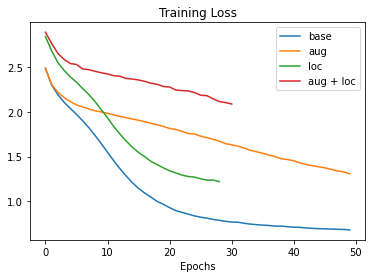

In [5]:
graph('train', 'loss', 'Training Loss')

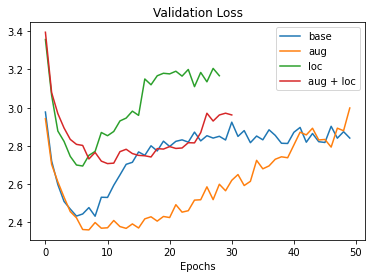

In [6]:
graph('val', 'loss', 'Validation Loss')

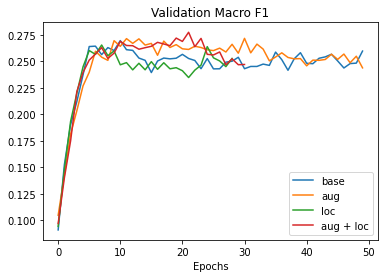

In [7]:
graph('val', 'macro_f1', 'Validation Macro F1')

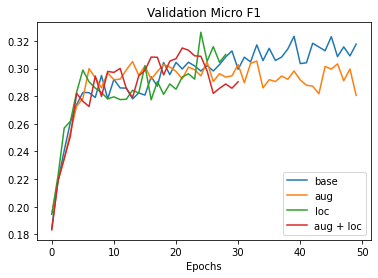

In [8]:
graph('val', 'micro_f1', 'Validation Micro F1')

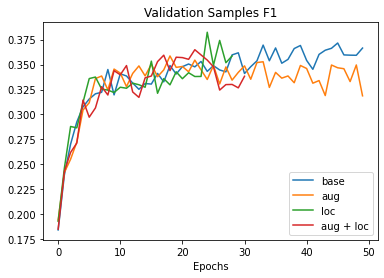

In [9]:
graph('val', 'samples_f1', 'Validation Samples F1')